In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tcd-dataset/tcd-is-2021-test.csv
/kaggle/input/tcd-dataset/tcd-is-2021-training.csv
/kaggle/input/tcd-dataset/tcd-is-2021-submission-example.csv
/kaggle/input/tcd-dataset/tcd-is-2021-submission-real.csv
/kaggle/input/tcd-cs-int-syst-admission-test-202021/tcd-is-2021-test.csv
/kaggle/input/tcd-cs-int-syst-admission-test-202021/tcd-is-2021-training.csv
/kaggle/input/tcd-cs-int-syst-admission-test-202021/tcd-is-2021-submission-example.csv
/kaggle/input/tcd-cs-int-syst-admission-test-202021/tcd-is-2021-submission-real.csv


In [2]:
training_dataset = pd.read_csv('/kaggle/input/tcd-dataset/tcd-is-2021-training.csv')
test_dataset = pd.read_csv('/kaggle/input/tcd-cs-int-syst-admission-test-202021/tcd-is-2021-test.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

In [4]:
training_dataset.head(21)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.944160
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.327640
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.176700
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.757930
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.162170
5,6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.990300
6,7,1982.0,NaN,71.0,State of Palestine,1205185,program associate,Bachelor,0,Black,174,150319.422600
7,8,2008.0,male,36.0,Israel,31419,retail specialist,NaN,0,Brown,190,11849.028760
8,9,2015.0,male,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.206070
9,10,2019.0,female,16.0,Cuba,1325383,lease analyst,Bachelor,1,Black,157,90940.689120


In [5]:
test_dataset.head(17)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN
5,111999,2013.0,female,56.0,United Arab Emirates,2223918,sales representative,Master,0,Black,175,NaN
6,112000,2002.0,male,49.0,Slovakia,1753551,senior resiliency planner,No,1,Black,173,NaN
7,112001,2012.0,female,66.0,Kyrgyzstan,467678,interviewer,Bachelor,1,Black,149,NaN
8,112002,2008.0,male,35.0,Togo,817914,quality assurance auditor,NaN,1,Black,205,NaN
9,112003,2003.0,male,49.0,Liberia,290455,office coordinator,No,0,Blond,136,NaN


In [6]:
training_dataset.shape

(111993, 12)

In [7]:
test_dataset.shape

(73230, 12)

In [8]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [9]:
training_dataset.describe()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111993.000000,111552.000000,111499.000000,1.119930e+05,111993.000000,111993.000000,1.119930e+05
mean,55997.000000,1999.421274,37.345304,8.388538e+05,0.500531,175.220192,1.092138e+05
std,32329.738686,11.576382,16.036694,2.196879e+06,0.500002,19.913889,1.498024e+05
min,1.000000,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03
25%,27999.000000,1989.000000,24.000000,7.273400e+04,0.000000,160.000000,3.077169e+04
50%,55997.000000,1999.000000,35.000000,5.060920e+05,1.000000,174.000000,5.733917e+04
75%,83995.000000,2009.000000,48.000000,1.184501e+06,1.000000,190.000000,1.260936e+05
max,111993.000000,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06


*To get Numerical based values from our Data Set*

In [10]:
numerical_data = ["Year of Record", "Age", "Body Height [cm]", "Size of City"]

*To get Catergory based values from our Data Set*

In [11]:
categorical_data = ["Gender","Hair Color", "Country", "Profession", "University Degree"]

*Our Predication Target*

In [12]:
target_data = ["Income in EUR"]

In [13]:
test_dataset.columns

Index(['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
       'Size of City', 'Profession', 'University Degree', 'Wears Glasses',
       'Hair Color', 'Body Height [cm]', 'Income'],
      dtype='object')

In [14]:
training_dataset.columns

Index(['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
       'Size of City', 'Profession', 'University Degree', 'Wears Glasses',
       'Hair Color', 'Body Height [cm]', 'Income in EUR'],
      dtype='object')

*Checking Count of nulls in both of our training and test datasets via array format*

In [15]:
np.array([[training_dataset.columns],[training_dataset.isnull().sum()], [test_dataset.isnull().sum()]])

array([[['Instance', 'Year of Record', 'Gender', 'Age', 'Country',
         'Size of City', 'Profession', 'University Degree',
         'Wears Glasses', 'Hair Color', 'Body Height [cm]',
         'Income in EUR']],

       [[0, 441, 7432, 494, 0, 0, 322, 7370, 0, 7242, 0, 0]],

       [[0, 295, 4862, 279, 0, 0, 195, 4857, 0, 4916, 0, 73230]]],
      dtype=object)

In [16]:
x = stats.zscore(training_dataset["Income in EUR"])
x[x>3].shape

(2399,)

*- Z score outlier detection strategy is giving 2399 outliers...Not convinced. 
Trying manual analysis*

In [17]:
training_dataset.sort_values('Income in EUR').head(7)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
19778,19779,2012.0,NaN,21.0,United Arab Emirates,15116,biological scientist,Bachelor,1,Black,197,-5696.906419
90605,90606,2017.0,NaN,15.0,Israel,4226,information systems and quality analyst,Bachelor,1,Black,151,-4912.846178
106523,106524,2016.0,NaN,48.0,Tajikistan,12772,chief engineer of dispute resolutions,Bachelor,1,Brown,210,-3915.539243
74826,74827,2007.0,NaN,44.0,Togo,50052,collections administrator,No,0,Black,159,-3680.798573
78757,78758,2018.0,NaN,20.0,Sierra Leone,31233,human resources college aide,Bachelor,0,Black,188,-3676.159426
37121,37122,2004.0,NaN,21.0,Switzerland,21256,desktop publisher,NaN,0,Black,172,-3435.669983
74116,74117,NaN,female,34.0,Togo,32926,facilities management assistant,Bachelor,0,Blond,136,-3320.153254


In [18]:
training_dataset.sort_values('Income in EUR').tail(7)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
60587,60588,2008.0,other,42.0,Guyana,64129,Anaesthetist,Master,1,Brown,188,2389023.693
21680,21681,2018.0,male,72.0,Poland,1425888,program assistant,Master,1,Blond,172,2457451.634
77645,77646,2018.0,female,75.0,Cyprus,277093,senior human capital partnership and performan...,PhD,0,Unknown,188,2515870.715
93021,93022,2002.0,other,62.0,Sudan,732735,unit clerk,Master,0,Black,195,2580242.873
60079,60080,2007.0,male,80.0,Angola,130609,triage coordinator,Master,1,Brown,219,3126311.634
108762,108763,2016.0,other,31.0,Vietnam,91384,radiation therapist,Master,1,Brown,187,3213681.751
78093,78094,2019.0,male,51.0,Kiribati,767902,Accounts Assistant,Bachelor,0,Blond,185,5285252.357


**Representaion of DATA by Pictorial Format**

* Data Visualization by numerical (Age) based dataset by Scatter Plot

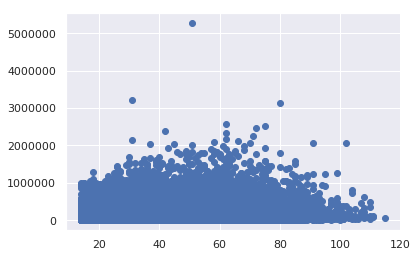

In [19]:
plt.scatter(training_dataset["Age"], training_dataset["Income in EUR"]) 

* Data Visualization by numerical (Year of Record) based dataset by Scatter Plot

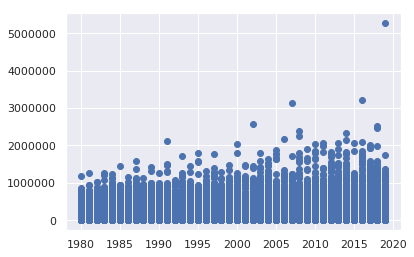

In [20]:
plt.scatter(training_dataset["Year of Record"], training_dataset["Income in EUR"]) 

* Data Visualization by Bar graph  

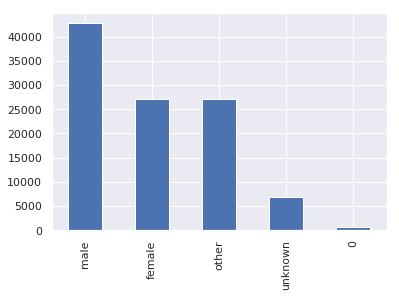

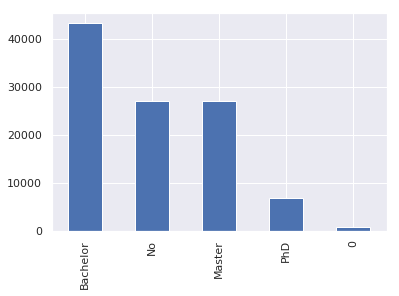

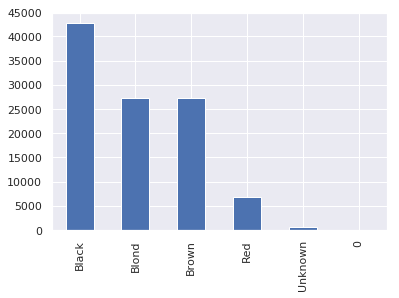

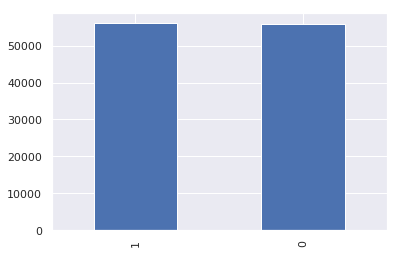

In [21]:
for field in ["Gender", "University Degree", "Hair Color", "Wears Glasses"]:
    training_dataset[field].value_counts().plot.bar()
    plt.show()

In [22]:
training_dataset["Profession"].value_counts()

pipefitter                                  261
procedural justice coordinator              256
port marine engineer                        246
production support                          246
preplacement nurse practitioner             245
                                           ... 
assistant commissioner of enforcement         1
compliance manager                            1
analyst manager                               1
assistant commissioner of administration      1
audiologist                                   1
Name: Profession, Length: 1340, dtype: int64

In [23]:
"Unknown" in training_dataset["Profession"].unique()

False

In [24]:
training_dataset["Year of Record"].value_counts()

1981.0    2953
1989.0    2876
1984.0    2872
1987.0    2860
2009.0    2857
2003.0    2856
1985.0    2840
1982.0    2836
2014.0    2823
1995.0    2814
1983.0    2814
2010.0    2811
1999.0    2810
2015.0    2804
2013.0    2798
2016.0    2795
2018.0    2786
1990.0    2785
2001.0    2782
1980.0    2781
2002.0    2781
2004.0    2778
2000.0    2777
1997.0    2777
1991.0    2776
2011.0    2773
1993.0    2770
1992.0    2769
1986.0    2766
2019.0    2763
1988.0    2760
2012.0    2760
2006.0    2759
1994.0    2739
2017.0    2735
1996.0    2734
1998.0    2712
2007.0    2712
2005.0    2680
2008.0    2678
Name: Year of Record, dtype: int64

In [25]:
training_dataset["Hair Color"].value_counts()

Black      42778
Blond      27248
Brown      27208
Red         6833
Unknown      655
0             29
Name: Hair Color, dtype: int64

In [26]:
"Unknown" in training_dataset["Country"].unique()

False

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


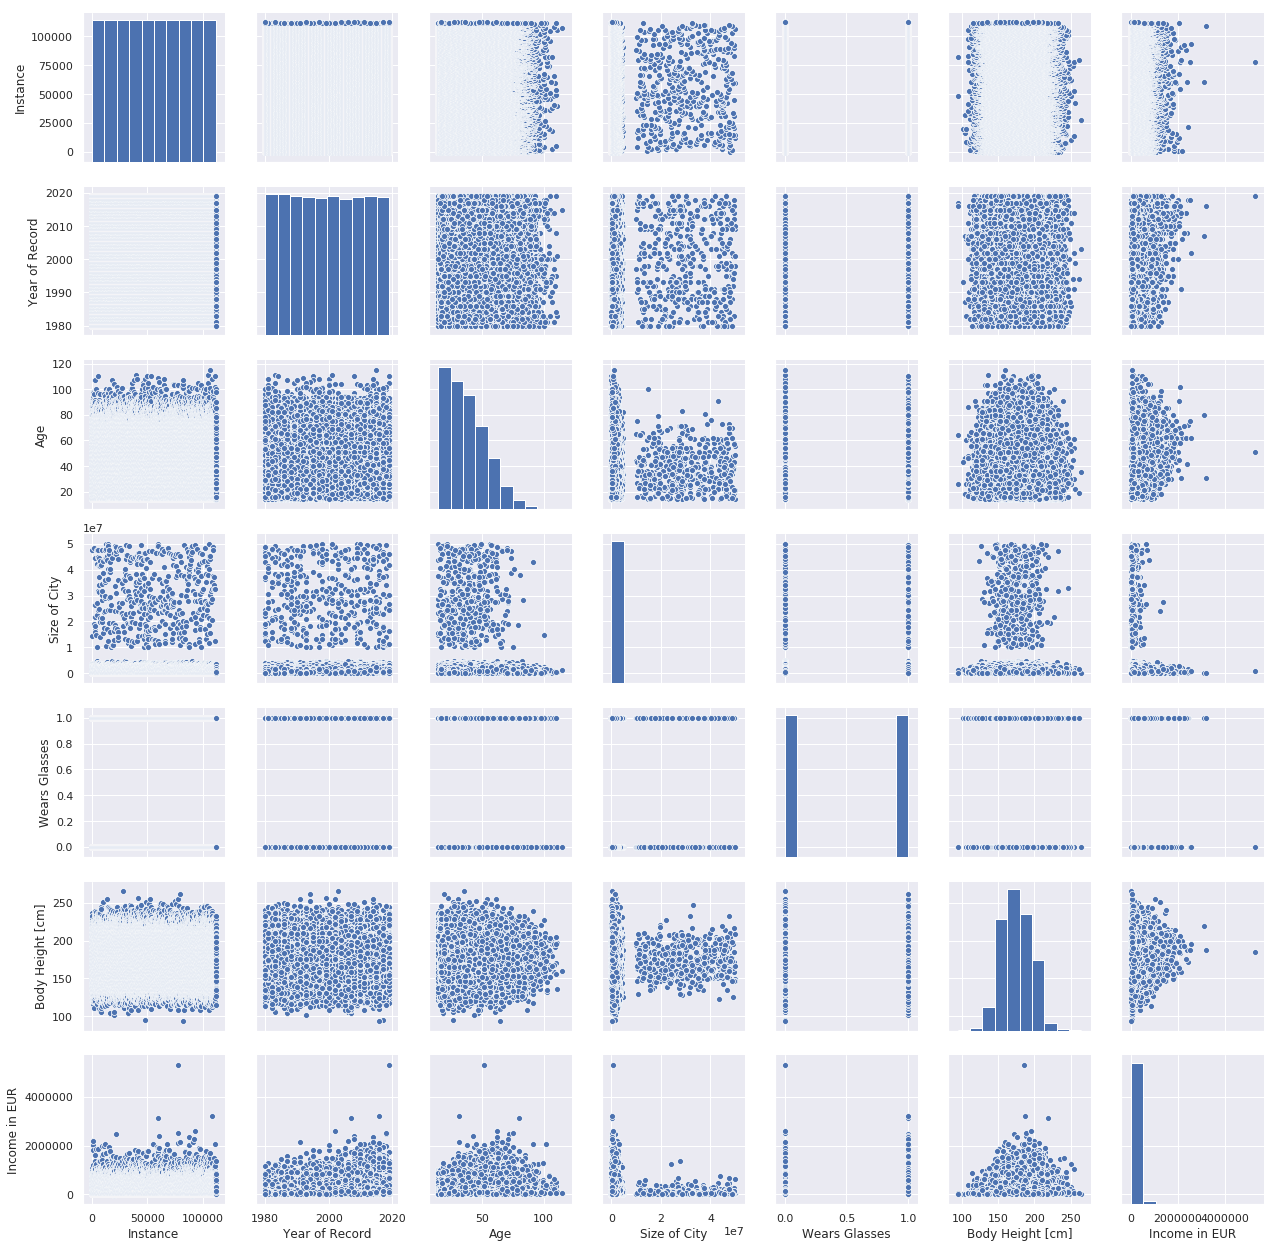

In [27]:
import seaborn as sns
g = sns.pairplot(training_dataset)

* Data Visualization by Box Plot graph

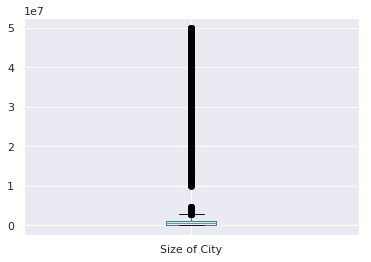

In [28]:
training_dataset["Size of City"].plot.box()

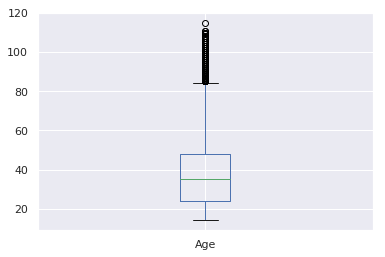

In [29]:
training_dataset["Age"].plot.box()

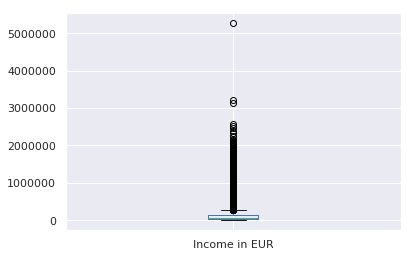

In [30]:
training_dataset["Income in EUR"].plot.box()

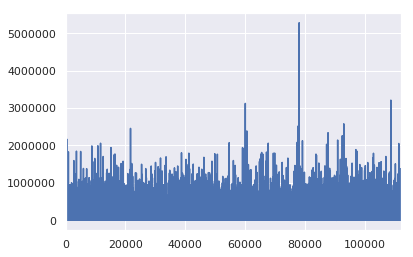

In [31]:
training_dataset["Income in EUR"].plot()

*Now List Data under Age of 18*

In [32]:
training_dataset[training_dataset["Age"]<18]

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
9,10,2019.0,female,16.0,Cuba,1325383,lease analyst,Bachelor,1,Black,157,90940.68912
11,12,1989.0,other,15.0,Togo,1040420,security administrator,No,0,Brown,191,24136.54464
29,30,1989.0,other,16.0,Tunisia,1548795,painter,Bachelor,1,Brown,180,96747.28875
30,31,1983.0,male,14.0,Lebanon,1131786,senior bi developer,No,0,Black,171,22619.43898
34,35,2018.0,male,16.0,Kyrgyzstan,67853,pest control worker,Bachelor,0,Black,161,10438.86522
...,...,...,...,...,...,...,...,...,...,...,...,...
111935,111936,2017.0,male,15.0,Oman,799851,searcher,Master,1,Red,166,145561.00780
111944,111945,1984.0,female,17.0,Croatia,1262,information clerk,Bachelor,0,Black,136,41166.66108
111945,111946,2019.0,female,17.0,Jordan,1495163,pipefitter,PhD,0,Brown,154,67018.16510
111974,111975,1983.0,female,16.0,Paraguay,20808,implementation coordinator,No,0,Blond,166,1762.59455


In [33]:
training_dataset = training_dataset[training_dataset["Income in EUR"]!=training_dataset["Income in EUR"].max()]

In [34]:
training_dataset["Income in EUR"].min()

-5696.906419

In [35]:
training_dataset[training_dataset["Income in EUR"]<0]

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
831,832,2019.0,NaN,17.0,Bulgaria,20237,geological engineer,No,1,Black,210,-2106.109069
1129,1130,1995.0,female,21.0,Israel,31048,plumbing inspector,No,0,Red,149,-306.052053
2913,2914,2004.0,NaN,58.0,Serbia,1026,lead design engineer,No,0,Black,151,-209.637511
4545,4546,2012.0,female,16.0,Sierra Leone,68935,host,No,1,Brown,162,-2459.479578
4974,4975,1995.0,NaN,16.0,Togo,21624,licensing clerk,No,0,Red,158,-168.535427
...,...,...,...,...,...,...,...,...,...,...,...,...
109633,109634,1984.0,female,14.0,Papua New Guinea,36586,field/desktop technician,Master,1,Black,145,-1025.003815
110348,110349,2013.0,female,15.0,Papua New Guinea,34805,elementary teacher,Master,1,Black,176,-1054.609972
110917,110918,1984.0,NaN,30.0,Switzerland,14168,fleet management assistant,Bachelor,1,Blond,157,-386.405758
111240,111241,2019.0,female,16.0,Serbia,7618,lodging manager,No,1,Brown,154,-2875.708061


> *NOTE: We encountered few Negative Income*

**Let's start with Transformation of our DataSet**

*Mapping all fields containing "0's" as a data to Unknown for Categorical based Data only*

In [36]:
for field in ["Gender", "Hair Color", "University Degree"]:
    training_dataset[field] = training_dataset[field].replace("0", "Unknown")
    training_dataset[field] = training_dataset[field].replace("unknown", "Unknown")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
training_dataset.head(7)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,Unknown,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,Unknown,0,Blond,188,38022.16217
5,6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030
6,7,1982.0,NaN,71.0,State of Palestine,1205185,program associate,Bachelor,0,Black,174,150319.42260


**Let's Acquire the Missing Values from Dataset**

In [38]:
for field in categorical_data:
    training_dataset[field].fillna("Unknown", inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
for field in numerical_data:
    training_dataset[field].fillna(training_dataset[field].mean(), inplace=True)

In [40]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111992 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111992 non-null int64
Year of Record       111992 non-null float64
Gender               111992 non-null object
Age                  111992 non-null float64
Country              111992 non-null object
Size of City         111992 non-null int64
Profession           111992 non-null object
University Degree    111992 non-null object
Wears Glasses        111992 non-null int64
Hair Color           111992 non-null object
Body Height [cm]     111992 non-null int64
Income in EUR        111992 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 11.1+ MB


**Handling Outliers amking use of Internal Quartile Ranges**


In [41]:
training_dataset = training_dataset.describe()
limits = {}
for field in numerical_data+["Income in EUR"]:
    limits[field] = {}
    iqr = training_dataset.loc["75%", field] - training_dataset.loc["25%", field]
    limits[field]["upper"] = training_dataset.loc["max", field] + 1.5*iqr
    limits[field]["lower"] = training_dataset.loc["min", field] - 1.5*iqr
    
    if limits[field]["lower"]<0:
        limits[field]["lower"] = 0

In [42]:
limits


{'Year of Record': {'upper': 2049.0, 'lower': 1950.0},
 'Age': {'upper': 151.0, 'lower': 0},
 'Body Height [cm]': {'upper': 310.0, 'lower': 49.0},
 'Size of City': {'upper': 51660165.875, 'lower': 0},
 'Income in EUR': {'upper': 3356663.988925, 'lower': 0}}

In [43]:
for field in numerical_data:
    print(training_dataset[training_dataset[field]<limits[field]["lower"]])
    print(training_dataset[training_dataset[field]>limits[field]["upper"]])

         Instance  Year of Record        Age  Size of City  Wears Glasses  \
std  32329.815596        11.55347  16.001305  2.196889e+06       0.500002   

     Body Height [cm]  Income in EUR  
std         19.913956   149002.40167  
       Instance  Year of Record       Age  Size of City  Wears Glasses  \
count  111992.0        111992.0  111992.0      111992.0       111992.0   

       Body Height [cm]  Income in EUR  
count          111992.0       111992.0  
Empty DataFrame
Columns: [Instance, Year of Record, Age, Size of City, Wears Glasses, Body Height [cm], Income in EUR]
Index: []
       Instance  Year of Record       Age  Size of City  Wears Glasses  \
count  111992.0        111992.0  111992.0      111992.0       111992.0   

       Body Height [cm]  Income in EUR  
count          111992.0       111992.0  
         Instance  Year of Record        Age  Size of City  Wears Glasses  \
std  32329.815596        11.55347  16.001305  2.196889e+06       0.500002   

     Body Height [cm]

**Maximum and Minimum Scaling of Numerical data in our dataset**

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
training_dataset[numerical_data] = scaler.fit_transform(training_dataset[numerical_data])

In [46]:
training_dataset.head()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111992.000000,1.000000,1.000000,0.002239,111992.000000,1.000000,111992.000000
mean,55996.802691,0.017752,0.000208,0.016778,0.500536,0.001387,109167.589849
std,32329.815596,0.000000,0.000018,0.043943,0.500002,0.000000,149002.401670
min,1.000000,0.017578,0.000000,0.000000,0.000000,0.000662,-5696.906419
25%,27998.750000,0.017659,0.000089,0.001453,0.000000,0.001251,30771.650275


In [47]:
target_scaler = MinMaxScaler()
training_dataset[target_data] = target_scaler.fit_transform(training_dataset[target_data])

**Split Data**

In [48]:
from sklearn.model_selection import train_test_split
train_indices, val_indices = train_test_split(training_dataset.index, test_size=0.25)

In [49]:
train_features.columns

NameError: name 'train_features' is not defined

In [50]:
test_features.columns

NameError: name 'test_features' is not defined

In [51]:
training_dataset.dtypes.sample(7)

Body Height [cm]    float64
Instance            float64
Size of City        float64
Age                 float64
Wears Glasses       float64
Year of Record      float64
Income in EUR       float64
dtype: object

In [52]:
one_hot_encoded_training_predictors = pd.get_dummies(training_dataset)

In [53]:
test_dataset.head(7)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN
5,111999,2013.0,female,56.0,United Arab Emirates,2223918,sales representative,Master,0,Black,175,NaN
6,112000,2002.0,male,49.0,Slovakia,1753551,senior resiliency planner,No,1,Black,173,NaN


In [54]:
# Map 0s to Unknown for categorical data
for field in categorical: #["Gender", "University Degree", "Hair Color"]:
    if field=="Wears Glasses":
        continue
    test_dataset[field] = test_dataset[field].replace("0", "Unknown")
    test_dataset[field] = test_dataset[field].replace("unknown", "Unknown")

NameError: name 'categorical' is not defined

In [55]:
for field in categorical:
    test_dataset[field].fillna("Unknown", inplace=True)

NameError: name 'categorical' is not defined

In [56]:
for field in numerical_data:
    test_dataset[field].fillna(test_dataset[field].mean(), inplace=True)

In [57]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73230 entries, 0 to 73229
Data columns (total 12 columns):
Instance             73230 non-null int64
Year of Record       73230 non-null float64
Gender               68368 non-null object
Age                  73230 non-null float64
Country              73230 non-null object
Size of City         73230 non-null int64
Profession           73035 non-null object
University Degree    68373 non-null object
Wears Glasses        73230 non-null int64
Hair Color           68314 non-null object
Body Height [cm]     73230 non-null int64
Income               0 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.7+ MB


In [58]:
test_dataset[numerical_data] = scaler.fit_transform(test_dataset[numerical_data])

In [59]:
test_dataset.head(7)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,0.307692,other,0.062500,Honduras,0.007843,senior project analyst,Master,1,Brown,0.315068,NaN
1,111995,0.153846,other,0.178571,Kyrgyzstan,0.000672,greeter,Bachelor,0,Black,0.383562,NaN
2,111996,0.358974,unknown,0.348214,Portugal,0.000694,liaison,Bachelor,1,Blond,0.315068,NaN
3,111997,0.102564,0,0.133929,Uruguay,0.029927,occupational therapist,No,0,Black,0.321918,NaN
4,111998,0.692308,other,0.026786,Serbia,0.002415,portfolio manager,No,0,Red,0.575342,NaN
5,111999,0.846154,female,0.375000,United Arab Emirates,0.044546,sales representative,Master,0,Black,0.465753,NaN
6,112000,0.564103,male,0.312500,Slovakia,0.035124,senior resiliency planner,No,1,Black,0.452055,NaN


In [60]:
test_categorical_data = pd.get_dummies(test_dataset[categorical_data])

In [61]:
test_categorical_data.shape

(73230, 1498)

In [62]:
categorical_data = ["Gender","Hair Color", "Country", "Profession", "University Degree"]

In [63]:
training_dataset.columns

Index(['Instance', 'Year of Record', 'Age', 'Size of City', 'Wears Glasses',
       'Body Height [cm]', 'Income in EUR'],
      dtype='object')

In [64]:
test_dataset.shape

(73230, 12)

In [65]:
training_dataset.shape

(8, 7)

In [66]:
training_dataset.head(7)

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111992.000000,1.000000,1.000000,0.002239,111992.000000,1.000000,0.036556
mean,55996.802691,0.017752,0.000208,0.016778,0.500536,0.001387,0.035679
std,32329.815596,0.000000,0.000018,0.043943,0.500002,0.000000,0.048053
min,1.000000,0.017578,0.000000,0.000000,0.000000,0.000662,0.000000
25%,27998.750000,0.017659,0.000089,0.001453,0.000000,0.001251,0.011328
50%,55996.500000,0.017748,0.000188,0.010122,1.000000,0.001376,0.019580
75%,83995.250000,0.017837,0.000304,0.023692,1.000000,0.001519,0.040936


In [67]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
Instance            8 non-null float64
Year of Record      8 non-null float64
Age                 8 non-null float64
Size of City        8 non-null float64
Wears Glasses       8 non-null float64
Body Height [cm]    8 non-null float64
Income in EUR       8 non-null float64
dtypes: float64(7)
memory usage: 832.0+ bytes


In [68]:
categorical_fields = ["Gender", "Country", "Profession", "University Degree"]
numerical_fields = ["Year of Record", "Age", "Size of City", "Body Height [cm]"]
result = ["Income in EUR"]

In [69]:
training_dataset["train"] = 1
test_dataset["train"] = 0

In [70]:
combined = pd.concat([training_dataset, test_dataset])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [71]:
combined.shape

(73238, 14)

In [72]:
#training_dataset["Gender"].replace('0', 'unknown', inplace = True)
combined["Gender"].replace('0', 'unknown', inplace = True)

In [73]:

#training_dataset["University Degree"].replace('0', 'No', inplace=True)
combined["University Degree"].replace('0', 'No', inplace=True)

In [74]:
#training_dataset.head()
combined.head(21)

,Age,Body Height [cm],Country,Gender,Hair Color,Income,Income in EUR,Instance,Profession,Size of City,University Degree,Wears Glasses,Year of Record,train
count,1.000000,1.000000,NaN,NaN,NaN,NaN,0.036556,111992.000000,NaN,0.002239,NaN,111992.000000,1.000000,1
mean,0.000208,0.001387,NaN,NaN,NaN,NaN,0.035679,55996.802691,NaN,0.016778,NaN,0.500536,0.017752,1
std,0.000018,0.000000,NaN,NaN,NaN,NaN,0.048053,32329.815596,NaN,0.043943,NaN,0.500002,0.000000,1
min,0.000000,0.000662,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,0.000000,0.017578,1
25%,0.000089,0.001251,NaN,NaN,NaN,NaN,0.011328,27998.750000,NaN,0.001453,NaN,0.000000,0.017659,1
50%,0.000188,0.001376,NaN,NaN,NaN,NaN,0.019580,55996.500000,NaN,0.010122,NaN,1.000000,0.017748,1
75%,0.000304,0.001519,NaN,NaN,NaN,NaN,0.040936,83995.250000,NaN,0.023692,NaN,1.000000,0.017837,1
max,0.000902,0.002189,NaN,NaN,NaN,NaN,1.000000,111993.000000,NaN,1.000000,NaN,1.000000,0.017927,1
0,0.062500,0.315068,Honduras,other,Brown,NaN,NaN,111994.000000,senior project analyst,0.007843,Master,1.000000,0.307692,0
1,0.178571,0.383562,Kyrgyzstan,other,Black,NaN,NaN,111995.000000,greeter,0.000672,Bachelor,0.000000,0.153846,0


In [75]:
for field in categorical_fields:
    #training_dataset[field].fillna('unknown', inplace=True)
    combined[field].fillna('unknown', inplace=True)

In [76]:
for field in numerical_fields:
    #training_dataset[field].fillna(training_dataset[field].mean(), inplace=True)
    combined[field].fillna(combined[field].mean(), inplace=True)

In [77]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73238 entries, count to 73229
Data columns (total 14 columns):
Age                  73238 non-null float64
Body Height [cm]     73238 non-null float64
Country              73238 non-null object
Gender               73238 non-null object
Hair Color           68314 non-null object
Income               0 non-null float64
Income in EUR        8 non-null float64
Instance             73238 non-null float64
Profession           73238 non-null object
Size of City         73238 non-null float64
University Degree    73238 non-null object
Wears Glasses        73238 non-null float64
Year of Record       73238 non-null float64
train                73238 non-null int64
dtypes: float64(8), int64(1), object(5)
memory usage: 8.4+ MB


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [79]:
combined[numerical_fields] = scaler.fit_transform(combined[numerical_fields])

In [80]:
combined.head()

,Age,Body Height [cm],Country,Gender,Hair Color,Income,Income in EUR,Instance,Profession,Size of City,University Degree,Wears Glasses,Year of Record,train
count,1.000000,1.000000,unknown,unknown,NaN,NaN,0.036556,111992.000000,unknown,0.002239,unknown,111992.000000,1.000000,1
mean,0.000208,0.001387,unknown,unknown,NaN,NaN,0.035679,55996.802691,unknown,0.016778,unknown,0.500536,0.017752,1
std,0.000018,0.000000,unknown,unknown,NaN,NaN,0.048053,32329.815596,unknown,0.043943,unknown,0.500002,0.000000,1
min,0.000000,0.000662,unknown,unknown,NaN,NaN,0.000000,1.000000,unknown,0.000000,unknown,0.000000,0.017578,1
25%,0.000089,0.001251,unknown,unknown,NaN,NaN,0.011328,27998.750000,unknown,0.001453,unknown,0.000000,0.017659,1


In [81]:
result_scaler = MinMaxScaler()

In [82]:
test_dataset = combined[combined['train'] == 0]
training_dataset.drop(['train', 'Income'], axis=1, inplace=True)
test_dataset.drop(['train', 'Income in EUR'], axis=1, inplace=True)

KeyError: "['Income'] not found in axis"

In [83]:
training_dataset.shape

(8, 8)

In [84]:
test_dataset.shape

(73230, 14)

In [85]:
training_dataset[result] = result_scaler.fit_transform(training_dataset[result])

In [86]:
training_dataset[result].head(17)

,Income in EUR
count,0.036556
mean,0.035679
std,0.048053
min,0.000000
25%,0.011328
50%,0.019580
75%,0.040936
max,1.000000


In [87]:
training_dataset.head()

,Instance,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,train
count,111992.000000,1.000000,1.000000,0.002239,111992.000000,1.000000,0.036556,1
mean,55996.802691,0.017752,0.000208,0.016778,0.500536,0.001387,0.035679,1
std,32329.815596,0.000000,0.000018,0.043943,0.500002,0.000000,0.048053,1
min,1.000000,0.017578,0.000000,0.000000,0.000000,0.000662,0.000000,1
25%,27998.750000,0.017659,0.000089,0.001453,0.000000,0.001251,0.011328,1


In [88]:
training_indices, validation_indices = train_test_split(training_dataset.index, test_size = 0.20)